In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy import stats

In [ ]:
Df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
display(Df.head())
display(Df.info())
display(Df.describe())
display(Df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(891, 12)

In [ ]:
print("Missing values :\n" ,Df.isnull().sum())

Missing values :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### AS YOU CAN SEE THE MISSING VALUES IN AGE IS 177 WE CAN FILL THAT BY USING FILLNA WITH MEDIAL OF THE AGE COULUM TO GET REVLENT RESULTS . AND CABIN DATASET WILL BE DROP AS IT HAS 687 NULL VALUES

In [ ]:
Df['Age'].fillna(Df['Age'].median(), inplace=True)


<ipython-input-7-e2df718ee99e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df['Age'].fillna(Df['Age'].median(), inplace=True)


In [ ]:
Df['Embarked'].fillna(Df['Embarked'].mode()[0], inplace=True)
#using mode because there are only 2 values null in the dataset

<ipython-input-8-bd14e4e06a90>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df['Embarked'].fillna(Df['Embarked'].mode()[0], inplace=True)


In [ ]:
# using drop method beause 600 plus values are missing
Df.drop(columns=["Cabin"], inplace=True)

Exploratory Data Analysis

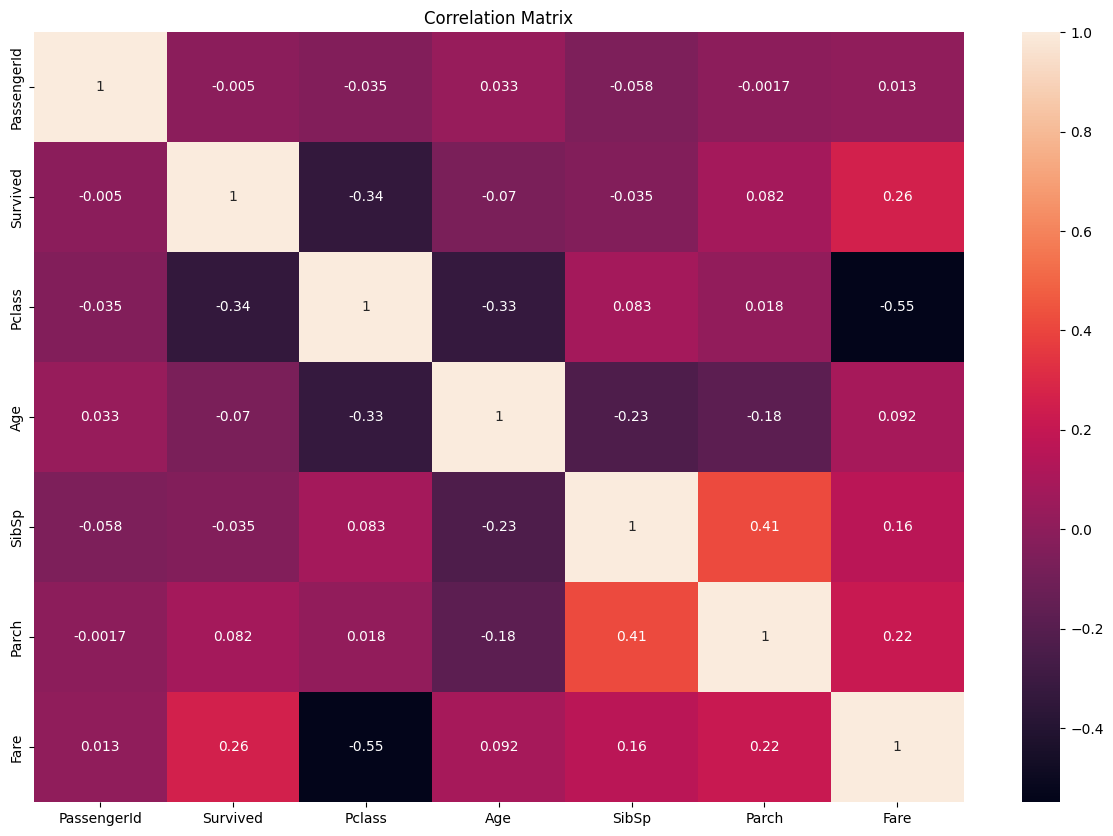

In [ ]:
plt.figure(figsize=(15,10))
# Select only numeric columns for correlation calculation
numeric_df = Df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

<ipython-input-13-6af24f8cae41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=Df, palette = "coolwarm")


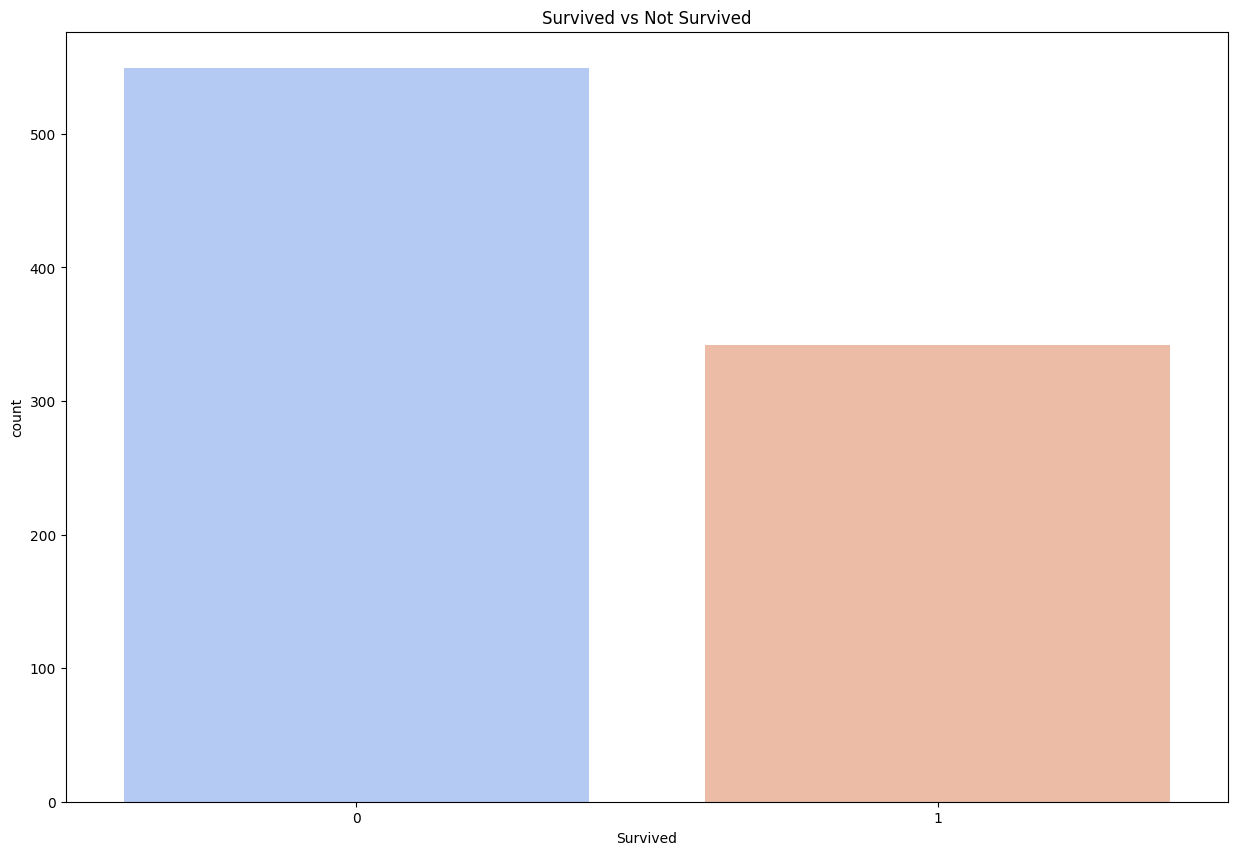

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Survived", data=Df, palette = "coolwarm")
plt.title("Survived vs Not Survived")
plt.show()


<ipython-input-14-c0cde0542d38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=Df, palette = "coolwarm")


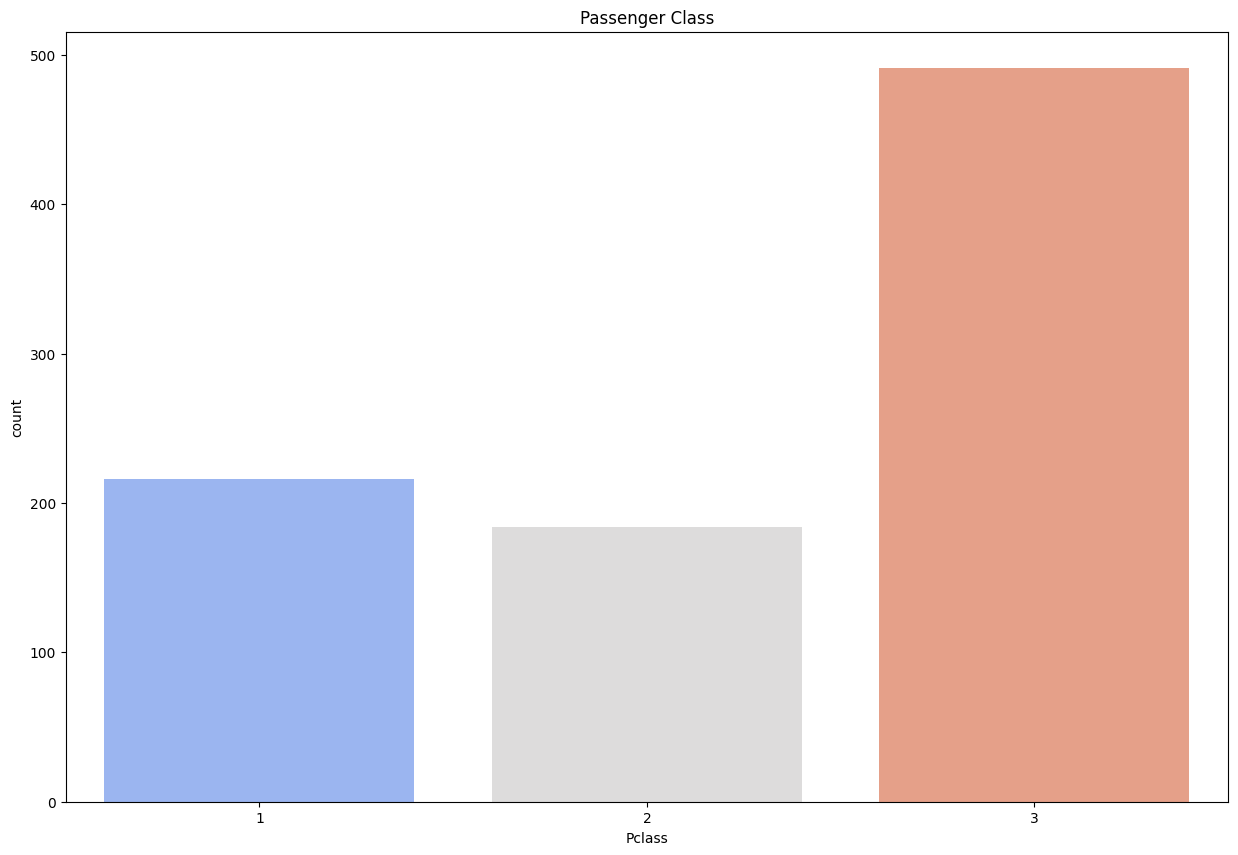

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Pclass", data=Df, palette = "coolwarm")
plt.title("Passenger Class")
plt.show()

<ipython-input-15-ae0e46916421>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=Df, palette = "coolwarm")


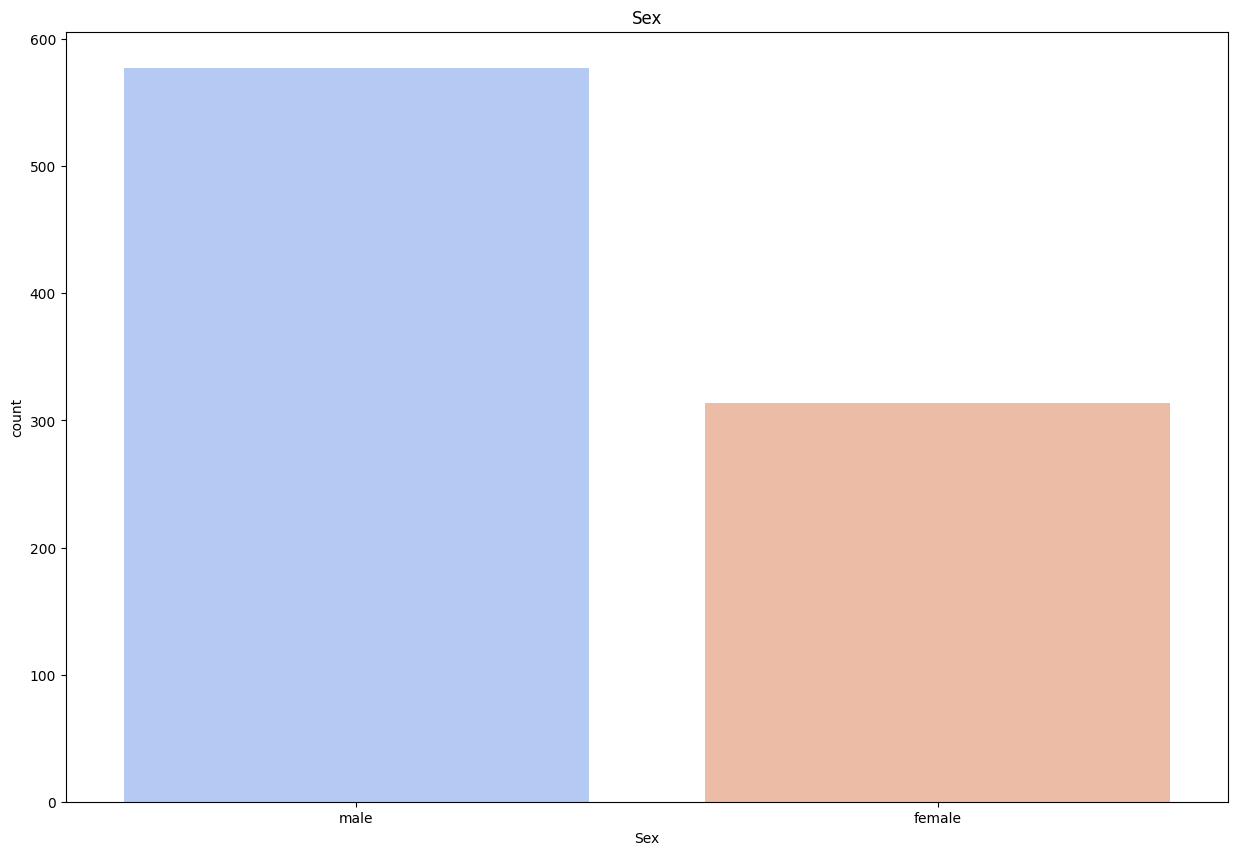

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Sex", data=Df, palette = "coolwarm")
plt.title("Sex")
plt.show()

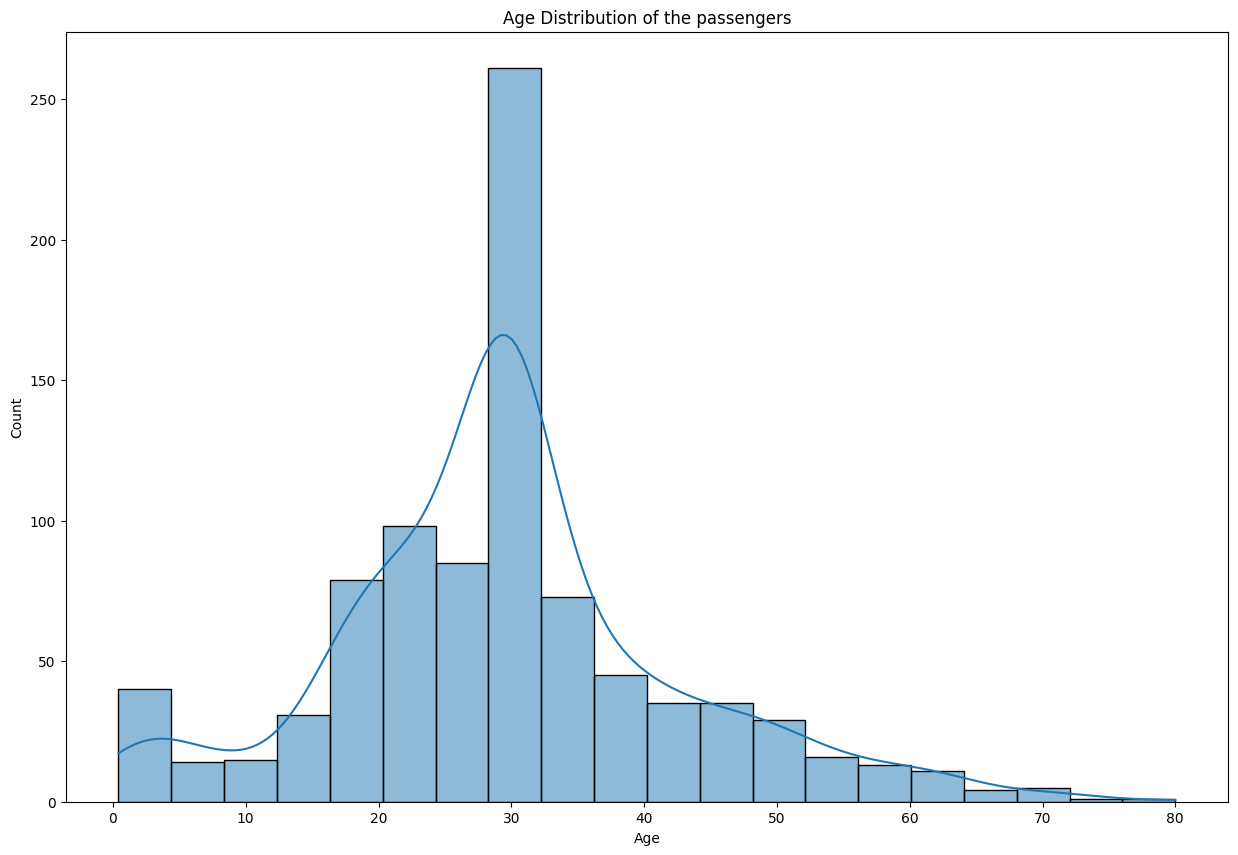

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(Df["Age"], bins=20, kde=True)
plt.title("Age Distribution of the passengers")
plt.show()

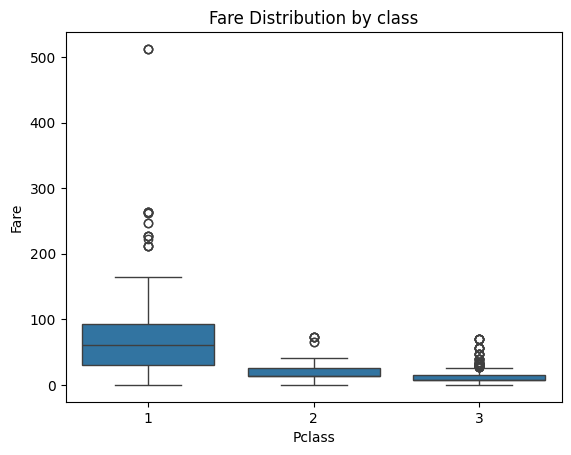

In [ ]:
sns.boxplot(x="Pclass", y="Fare", data=Df)
plt.title("Fare Distribution by class")
plt.show()

3.Feature Engineering
Create a new feature "family size" by combining "sibsp"(siblings /spouses aboard) and "parch"(parents /children abroad) + 1  

In [ ]:
Df['FamilySize'] = Df['SibSp'] + Df['Parch'] + 1

In [ ]:
#Creating a binary feature "is alone" where 1 indicates is travelling alone
Df['IsAlone'] = (Df['FamilySize'] == 1).astype(int)
display(Df['IsAlone'])

,IsAlone
0,0
1,0
2,1
3,0
4,1
...,...
886,1
887,1
888,0
889,1


4.Feature Encoding
convert categorical variables into numerical using label encoder

In [ ]:
#Converting catergorical variables into numeric using label encoder
le = LabelEncoder()
Df["Sex"] = le.fit_transform(Df["Sex"])
Df["Embarked"] = le.fit_transform(Df["Embarked"])

5.Feature Scaling

In [ ]:
#standarize "Age"and "Fare" to have mean = 0 and std = 1 to normalize the distribution
scaler = StandardScaler()
Df[["Age", "Fare"]] = scaler.fit_transform(Df[["Age", "Fare"]])

6.Hypothesis Testing (surivival based on gender)

In [ ]:
table = pd.crosstab(Df['Sex'], Df['Survived'])
display(table)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
chi2 ,p ,dof , expected = stats.chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
if p < 0.05:
    print("Reject the null hypothesis. There is a significant difference in survival rates between male and female passengers.Significant relationship: Gender affects survival")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in survival rates between male and female passengers.No significant relationship: Gender does not affect survival")

Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of freedom: 1
Expected frequencies:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]
Reject the null hypothesis. There is a significant difference in survival rates between male and female passengers.Significant relationship: Gender affects survival
